In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# ensemble
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

# metric
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## **Business Understanding**

Anda bekerja sebagai data scientist di perusahaan asuransi. Anda diminta untuk memprediksi apakah seorang calon nasabah akan mengajukan klaim ketika dia memiliki asuransi atau tidak. 

Perusahaan Asuransi harus memprediksi apakah nasabah akan mengajukan claim atau tidak. Jika ada claim nasabah, perusahaan perlu melakukan pembayaran. Penentuan apakah nasabah benar-benar mengajukan claim atau tidak menjadi penting karena diperlukan persiapan biaya yang besar. Ada dua case yang perlu dipertimbangkan dalam model machine learning prediksi claim:

- FP :
    - Machine learning memprediksi nasabah akan mengajukan claim padahal pada kenyataannya tidak mengajukan claim
    - Jika nasabah diprediksi mengajukan claim, maka ada sejumlah uang yang dipersiapkan untuk melakukan pembayaran namun tidak jadi dibayarkan. Hal ini agak berdampak ke perputaran uang dalam perusahaan.

- FN :
    - Machine learning memprediksi nasabah tidak mengajukan claim, namun kenyataannya mengajukan claim
    - Jika nasabah diprediksi tidak mengajukan claim, maka perusahaan perlu mempersiapkan uang **<u>segera</u>** untuk melakukan pembayaran claim. Keterlambatan/gagal bayar claim dapat menyebabkan hilangnya kepercayaan nasabah terhadap perusahaan.

- Asumsi kerugian pada FP sebesar 300 juta rupiah
- Asumsi kerugian pada FN sebesar 1 miliar rupiah
- Kesalahan memprediksi nasabah pada case FN menyebabkan kerugian yang lebih besar karena kehilangan nasabah dapat berpengaruh terhadap pemasukan perusahaan. Sehingga, nilai FN perlu diturunkan sekecil mungkin dan metric yang tepat untuk digunakan adalah **F1**

## **1. Load Dataset**

In [2]:
df = pd.read_csv(r"C:\Users\hp\Desktop\JCDS Mauritz\dataset\Car_Insurance_Claim.csv")
df

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [4]:
# age category
df['AGE'].value_counts()

AGE
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: count, dtype: int64

In [5]:
# gender category
df['GENDER'].value_counts()

GENDER
female    5010
male      4990
Name: count, dtype: int64

In [6]:
# outcome category, target is imbalance
df['OUTCOME'].value_counts()

OUTCOME
0.0    6867
1.0    3133
Name: count, dtype: int64

In [7]:
# education category
df['EDUCATION'].value_counts()

EDUCATION
high school    4157
university     3928
none           1915
Name: count, dtype: int64

In [8]:
# race category
df['RACE'].value_counts()

RACE
majority    9012
minority     988
Name: count, dtype: int64

Check Missing Values

In [9]:
df.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [10]:
df_isna2 = df[(df['ANNUAL_MILEAGE'].isna()) & (df['CREDIT_SCORE'].isna())]
df_isna2.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
136,851152,26-39,female,majority,10-19y,none,working class,NaN,0.0,before 2015,1.0,1.0,10238,NaN,sedan,0,0,1,0.0
252,653061,26-39,female,majority,0-9y,university,upper class,NaN,0.0,after 2015,0.0,1.0,10238,NaN,sedan,0,0,0,0.0
368,520007,16-25,male,majority,0-9y,high school,poverty,NaN,0.0,before 2015,0.0,1.0,10238,NaN,sedan,0,0,0,1.0
410,291891,26-39,male,majority,10-19y,none,working class,NaN,1.0,before 2015,0.0,1.0,32765,NaN,sedan,4,1,1,1.0
610,646956,26-39,male,majority,0-9y,university,middle class,NaN,1.0,before 2015,1.0,1.0,32765,NaN,sedan,0,0,0,1.0


In [11]:
df.duplicated().sum()

0

## **2. EDA**

In [12]:
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [13]:
num_features = df.drop(columns='ID').describe().columns

C:\Users\hp\AppData\Local\Temp\ipykernel_20824\91352823.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_20824\91352823.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_20824\91352823.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_20824\91352823.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_20824\91352823.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_20824\91352823.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_20824\91352823.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_20824\91352823

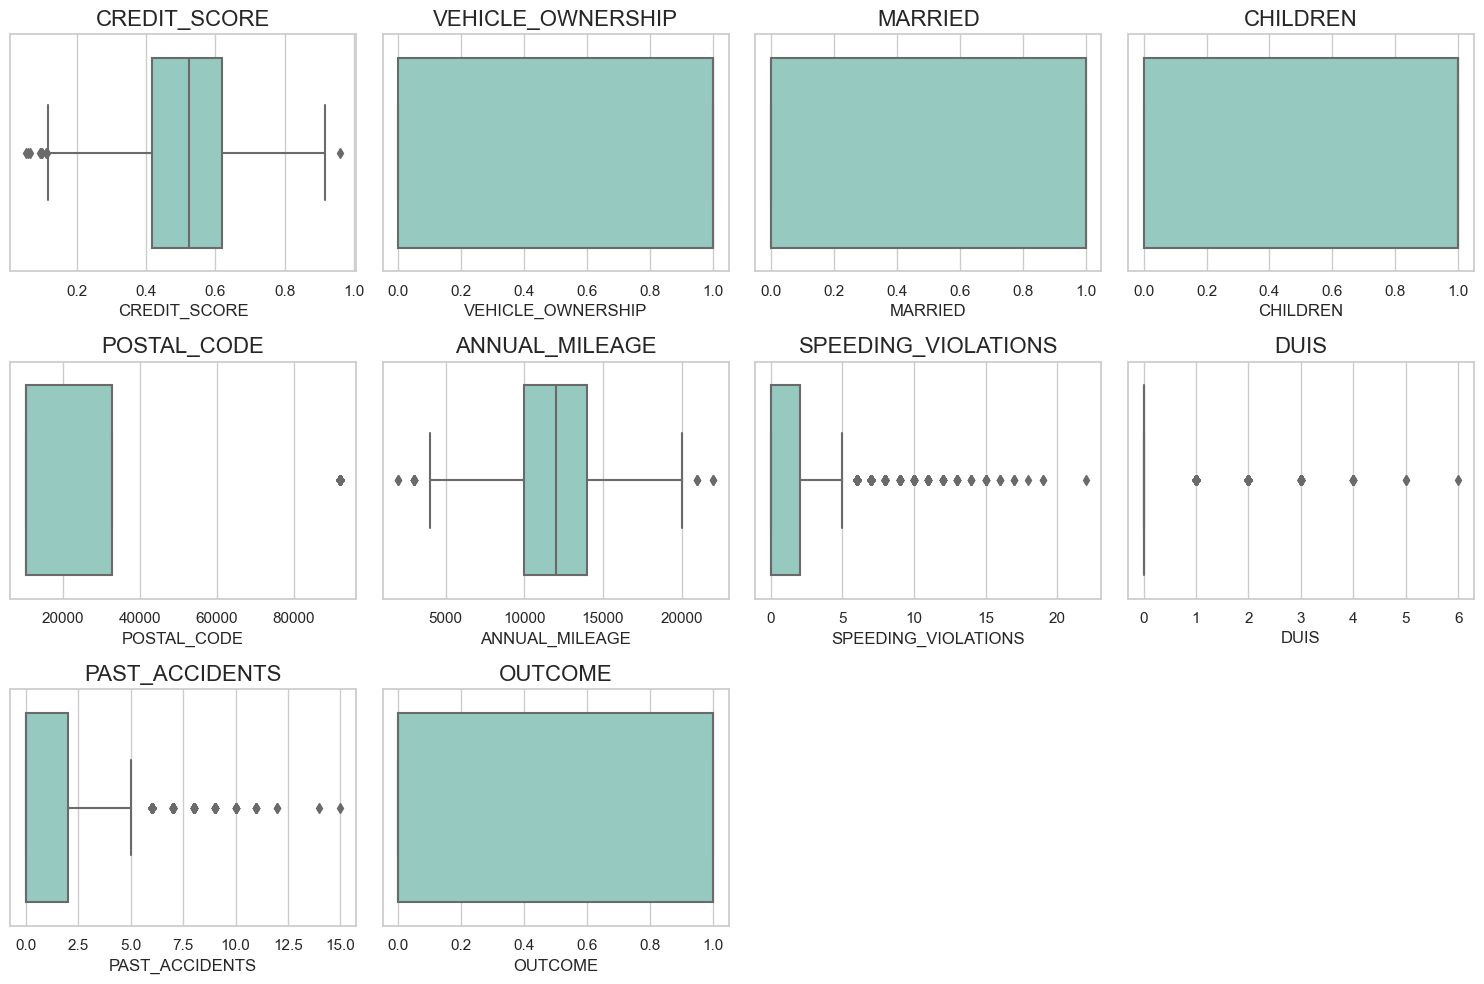

In [14]:
plt.figure(figsize=(15,10), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1

for feature in num_features:
    ax = plt.subplot(3,4,plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, size=16)
    plt.tight_layout()
    plotnumber += 1

plt.show()

In [15]:
# check postal code values
df['POSTAL_CODE'].value_counts()

POSTAL_CODE
10238    6940
32765    2456
92101     484
21217     120
Name: count, dtype: int64

In [16]:
# postal code defines location, postal code is cast to object
df['POSTAL_CODE'] = df['POSTAL_CODE'].astype(str)

In [17]:
df.drop(columns='ID').corr(numeric_only=True)

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
CREDIT_SCORE,1.000000,0.312037,0.281238,0.220658,-0.174453,0.204542,0.127366,0.180978,-0.325286
VEHICLE_OWNERSHIP,0.312037,1.000000,0.175626,0.125990,-0.097433,0.133868,0.086567,0.119521,-0.378921
MARRIED,0.281238,0.175626,1.000000,0.287009,-0.462193,0.218855,0.120840,0.215269,-0.262104
CHILDREN,0.220658,0.125990,0.287009,1.000000,-0.447655,0.220415,0.115354,0.206295,-0.232835
ANNUAL_MILEAGE,-0.174453,-0.097433,-0.462193,-0.447655,1.000000,-0.323547,-0.116598,-0.195217,0.187154
SPEEDING_VIOLATIONS,0.204542,0.133868,0.218855,0.220415,-0.323547,1.000000,0.359838,0.443074,-0.291862
DUIS,0.127366,0.086567,0.120840,0.115354,-0.116598,0.359838,1.000000,0.259359,-0.189352
PAST_ACCIDENTS,0.180978,0.119521,0.215269,0.206295,-0.195217,0.443074,0.259359,1.000000,-0.311495
OUTCOME,-0.325286,-0.378921,-0.262104,-0.232835,0.187154,-0.291862,-0.189352,-0.311495,1.000000


Text(0.5, 1.0, 'Heatmap Correlation')

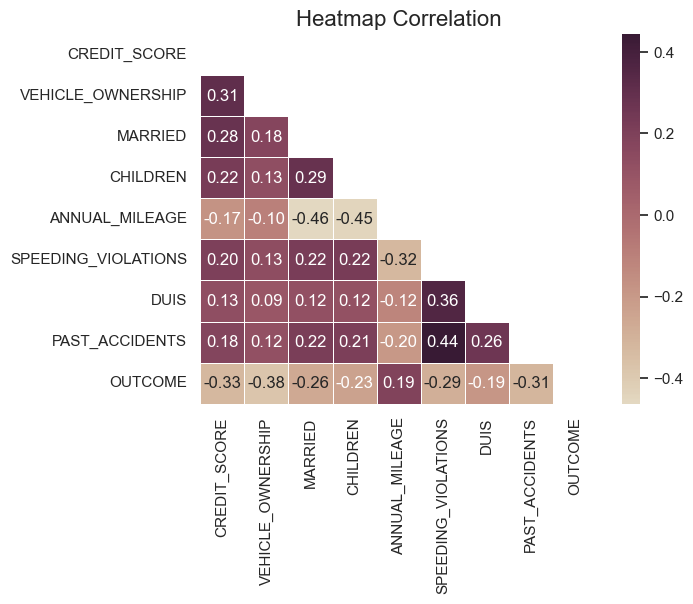

In [18]:
sns.set(style='white')
sns.heatmap(data=df.drop(columns='ID').corr(numeric_only=True),
            cmap = sns.cubehelix_palette(start = 0.3, as_cmap=True),
            linecolor = 'white',
            linewidths = .5,
            annot = True,
            mask = np.triu(df.drop(columns='ID').corr(numeric_only=True)),
            fmt = '.2f')
plt.title('Heatmap Correlation', size=16)

<Axes: xlabel='OUTCOME', ylabel='count'>

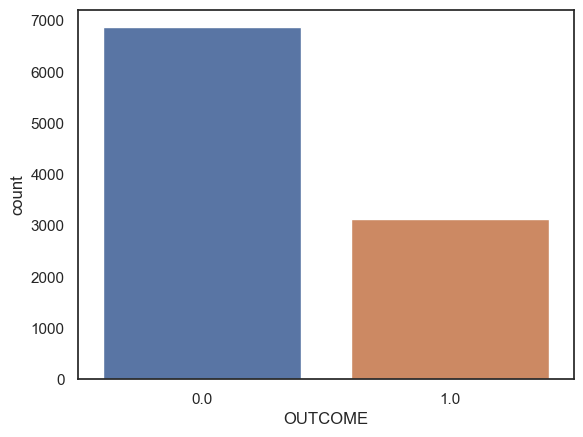

In [19]:
sns.countplot(data=df,x='OUTCOME')

Insight:
> Dataset yang dimiliki tidak balance/imbalance.

> Diperlukan resampling untuk menyeimbangkan jumlah outcome yang tidak claim dan berhasil claim, agar model machine learning tidak bias ke jumlah target yang lebih banyak.

<Axes: title={'center': 'Speeding Violations by Vehicle Ownership and Marriage Status'}, xlabel='VEHICLE_OWNERSHIP', ylabel='SPEEDING_VIOLATIONS'>

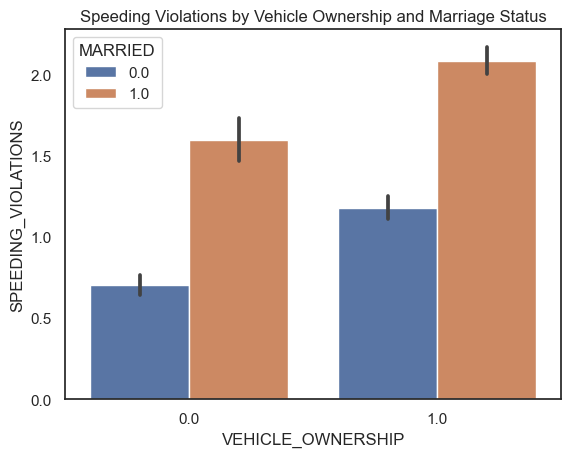

In [20]:
plt.title('Speeding Violations by Vehicle Ownership and Marriage Status')
sns.barplot(data=df,x='VEHICLE_OWNERSHIP', y='SPEEDING_VIOLATIONS', hue='MARRIED', palette='deep')

Insight:
> Nasabah yang menikah lebih banyak melanggar aturan kecepatan dibandingkan nasabah yang belum menikah.

> Nasabah yang menggunakan nama pribadi atas kepemilikan kendaraan lebih banyak melanggar aturan kecepatan dibandingkan dengan nasabah yang tidak memiliki kendaraan pribadi.

<Axes: title={'center': 'Numbers of Past Accidents by Speeding Violations and Postal Code'}, xlabel='SPEEDING_VIOLATIONS', ylabel='PAST_ACCIDENTS'>

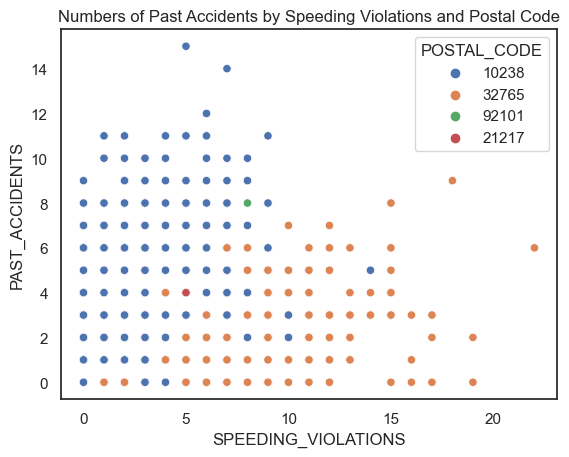

In [21]:
plt.title('Numbers of Past Accidents by Speeding Violations and Postal Code')
sns.scatterplot(data=df,x='SPEEDING_VIOLATIONS', y='PAST_ACCIDENTS', hue='POSTAL_CODE', palette='deep')

Insight:
> Nasabah yang bertempat tinggal di Postal Code 32765 mendapat banyak pelanggaran batas kecepatan, namun belum banyak kasus kecelakaan yang diketahui.

> Nasabah yang bertempat tinggal di Postal Code 10238 memiliki rekam jejak kecelakaan yang tinggi dan cenderung mendapatkan pelanggaran batas kecepatan yang sedikit.

## **3. Define X and y**

In [22]:
X = df.drop(columns=['ID', 'OUTCOME'])
y = df['OUTCOME']

## **4. Data Splitting**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,
                 y,
                 test_size=0.2,
                 random_state=0,
                 stratify=y)

In [24]:
X.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1


## **5. Data Preprocessing**

- SimpleImputer(Median): 'ANNUAL_MILEAGE', 'CREDIT_SCORE'
- OneHotEncoder: 'GENDER', 'RACE', 'VEHICLE_YEAR', 'VEHICLE_TYPE'
- OrdinalEncoder: 'EDUCATION, 'DRIVING_EXPERIENCE', 'INCOME'
- BinaryEncoder: 'POSTAL_CODE', 'AGE'
- RobustScaler: 'CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'
- passthrough = 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN'

In [25]:
pipe_simple_robust = Pipeline(
    [
        ('simple', SimpleImputer(strategy='median')),
        ('robust', RobustScaler())
    ]
)

In [26]:
# mapping untuk ordinal encoding kolom education
education_encoding = [{
                    'col':'EDUCATION',
                    'mapping':{'none':1, 'high school':2, 'university':3}
}]

In [27]:
# mapping untuk ordinal encoding kolom driving experience
de_encoding = [{
                    'col':'DRIVING_EXPERIENCE',
                    'mapping':{'0-9y':1, '10-19y':2, '20-29y':3, '30+y':4}
}]

In [28]:
# mapping untuk ordinal encoding kolom driving experience
income_encoding = [{
                    'col':'INCOME',
                    'mapping':{'poverty':1, 'working class':2, 'middle class':3, 'upper class':4}
}]

In [29]:
pipe_ord_robust = Pipeline(
    [
        ('ordinal', OrdinalEncoder(mapping=[
                                   {'col': 'EDUCATION', 'mapping': education_encoding},
                                   {'col': 'DRIVING_EXPERIENCE', 'mapping': de_encoding},
                                   {'col': 'INCOME', 'mapping': income_encoding}])),
        ('robust', RobustScaler())
    ]
)

In [30]:
transformer = ColumnTransformer(
    [
        ('onehot', OneHotEncoder(), ['GENDER', 'RACE', 'VEHICLE_YEAR', 'VEHICLE_TYPE']),
        ('pipe_ord_robust', pipe_ord_robust, ['EDUCATION', 'DRIVING_EXPERIENCE', 'INCOME']),
        ('binary', BinaryEncoder(), ['POSTAL_CODE', 'AGE']),
        ('pipe_simple_robust', pipe_simple_robust, ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'])
    ], remainder = 'passthrough'
)
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(),
                                 ['GENDER', 'RACE', 'VEHICLE_YEAR',
                                  'VEHICLE_TYPE']),
                                ('pipe_ord_robust',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'EDUCATION',
                                                                           'data_type': dtype('int64'),
                                                                           'mapping': 0    {'col': 'EDUCATION', 'mapping': {'none': 1, 'h...
dtype: object},
                                                                          {'col': 'DRIVING_EXPERIENCE',
                                                                           'data_...
                                                                           'mapping': 0    {'col': 'INCOME', 'mapping': {'poverty': 1, 'w...
dtype: object}])),
                                                 ('robust', RobustScaler())]),
                                 ['EDUCATION', 'DRIVING_EXPERIENCE', 'INCOME']),
                                ('binary', BinaryEncoder(),
                                 ['POSTAL_CODE', 'AGE']),
                                ('pipe_simple_robust',
                                 Pipeline(steps=[('simple',
                                                  SimpleImputer(strategy='median')),
                                                 ('robust', RobustScaler())]),
                                 ['CREDIT_SCORE', 'ANNUAL_MILEAGE',
                                  'SPEEDING_VIOLATIONS', 'DUIS',
                                  'PAST_ACCIDENTS'])])

## **6. Cross Validation**

In [31]:
# define model
logreg = LogisticRegression(random_state=0)
tree = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier()
bagging = BaggingClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
adaboost = AdaBoostClassifier(random_state=0)
gradient = GradientBoostingClassifier(random_state=0)
xgboost = xgb.XGBClassifier(random_state=0)

In [32]:
# define voting
voting = VotingClassifier(estimators=[('clf1', logreg),
                             ('clf2', tree),
                             ('clf3', knn)])    # base learner

# define stacking
stacking = StackingClassifier(estimators=[('clf1', logreg),
                             ('clf2', tree),
                             ('clf3', knn)],    # base learner
                             final_estimator=logreg) # meta learner

In [33]:
# Cross validation

models = [logreg, knn, tree, voting, stacking, bagging, rf, adaboost, gradient, xgboost]
cv_all = []
cv_mean = []
cv_std = []

for i in models:
    # pipe model
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', i)
        ])
    # cross_val
    crossval = cross_val_score(
        estimator = pipe_model,
        X = X_train,
        y = y_train,
        cv = 5,
        n_jobs= -1,
        scoring = 'f1'
    )

    cv_all.append(crossval.round(2))
    cv_mean.append(crossval.mean())
    cv_std.append(crossval.std())

In [34]:
df_cv = pd.DataFrame(
    {
        'model':models,
        'cv_all':cv_all,
        'cv_mean':cv_mean,
        'cv_std':cv_std
    }
)
df_cv

,model,cv_all,cv_mean,cv_std
0,LogisticRegression(random_state=0),"[0.71, 0.7, 0.72, 0.74, 0.71]",0.718272,0.013375
1,KNeighborsClassifier(),"[0.68, 0.66, 0.66, 0.68, 0.67]",0.669317,0.009297
2,DecisionTreeClassifier(random_state=0),"[0.65, 0.63, 0.64, 0.63, 0.63]",0.636679,0.009474
3,"VotingClassifier(estimators=[('clf1', Logistic...","[0.73, 0.7, 0.72, 0.72, 0.7]",0.712430,0.011511
4,"StackingClassifier(estimators=[('clf1', Logist...","[0.72, 0.69, 0.72, 0.73, 0.71]",0.715735,0.013185
5,BaggingClassifier(random_state=0),"[0.7, 0.67, 0.67, 0.69, 0.65]",0.677630,0.017312
6,RandomForestClassifier(random_state=0),"[0.7, 0.69, 0.69, 0.72, 0.69]",0.697366,0.013814
7,AdaBoostClassifier(random_state=0),"[0.71, 0.69, 0.71, 0.74, 0.7]",0.710130,0.015478
8,GradientBoostingClassifier(random_state=0),"[0.72, 0.72, 0.73, 0.74, 0.71]",0.725777,0.011769
9,"XGBClassifier(base_score=None, booster=None, c...","[0.72, 0.7, 0.71, 0.73, 0.7]",0.710846,0.010741


Model GradientBoostingClassifier dipilih karena memiliki nilai f1 rata-rata tertinggi sebesar 0.725 dan standar deviasi rata-rata relatif rendah sebesar 0.011

## **7. Hyperparameter Tuning**
Finding best parameter of machine learning model, including imbalance treatment

In [35]:
# import resampler library
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
from imblearn.pipeline import Pipeline

In [36]:
# define resampler
ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=0)
smote = SMOTE(random_state=0)
nm = NearMiss(sampling_strategy='majority')

In [37]:
GradientBoostingClassifier()

GradientBoostingClassifier()

In [38]:
# hyperparam
hyperparam = {'modeling__n_estimators': range(100,600,100),
              'modeling__learning_rate': [0.1, 0.05, 0.01, 0.005, 0.001],
              'modeling__max_depth': range(3,10),
              'modeling__min_samples_leaf': range(3,10),
              'modeling__min_samples_split': range (3,10),
              'resampler': (None, ros, rus, smote, nm)
            }

# pipe prep model
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('resampler', smote),
    ('modeling', gradient)
])

randomsearch = RandomizedSearchCV(
    estimator= pipe_model,
    cv = 5,
    param_distributions= hyperparam,
    scoring = 'f1',
    n_jobs = -1,
    n_iter = 100,
    random_state=0,
    error_score='raise'
)
randomsearch

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['GENDER',
                                                                                'RACE',
                                                                                'VEHICLE_YEAR',
                                                                                'VEHICLE_TYPE']),
                                                                              ('pipe_ord_robust',
                                                                               Pipeline(steps=[('ordinal',
                                                                                                OrdinalEncoder(mapping=[{'col': 'EDUCATION',
                                                                                                                         'data_type': dtype('int64'),
                                                                                                                         'mapping': 0    {'col...
                                                                    0.01, 0.005,
                                                                    0.001],
                                        'modeling__max_depth': range(3, 10),
                                        'modeling__min_samples_leaf': range(3, 10),
                                        'modeling__min_samples_split': range(3, 10),
                                        'modeling__n_estimators': range(100, 600, 100),
                                        'resampler': (None,
                                                      RandomOverSampler(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      SMOTE(random_state=0),
                                                      NearMiss(sampling_strategy='majority'))},
                   random_state=0, scoring='f1')

In [39]:
randomsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['GENDER',
                                                                                'RACE',
                                                                                'VEHICLE_YEAR',
                                                                                'VEHICLE_TYPE']),
                                                                              ('pipe_ord_robust',
                                                                               Pipeline(steps=[('ordinal',
                                                                                                OrdinalEncoder(mapping=[{'col': 'EDUCATION',
                                                                                                                         'data_type': dtype('int64'),
                                                                                                                         'mapping': 0    {'col...
                                                                    0.01, 0.005,
                                                                    0.001],
                                        'modeling__max_depth': range(3, 10),
                                        'modeling__min_samples_leaf': range(3, 10),
                                        'modeling__min_samples_split': range(3, 10),
                                        'modeling__n_estimators': range(100, 600, 100),
                                        'resampler': (None,
                                                      RandomOverSampler(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      SMOTE(random_state=0),
                                                      NearMiss(sampling_strategy='majority'))},
                   random_state=0, scoring='f1')

In [56]:
randomsearch.best_score_

0.7528072024629856

In [57]:
randomsearch.best_params_

{'resampler': RandomOverSampler(random_state=0),
 'modeling__n_estimators': 200,
 'modeling__min_samples_split': 9,
 'modeling__min_samples_leaf': 9,
 'modeling__max_depth': 3,
 'modeling__learning_rate': 0.05}

## **8. Imbalance Treatment**
In this section, f1 score is compared to optimized threshold method, where the predicted result is adjusted to get higher f1 score.

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Benchmark

In [58]:
# define model
model = GradientBoostingClassifier(n_estimators = 200, min_samples_split = 9, min_samples_leaf = 9, max_depth = 3, learning_rate = 0.05, random_state=0)

# pipe prep model
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', gradient)
])

# fit
pipe_model.fit(X_train, y_train)

# Predict
y_pred_benchmark = pipe_model.predict(X_test)

# f1 score
f1_benchmark = f1_score(y_test, y_pred_benchmark)
f1_benchmark

0.7330016583747927

Optimized Threshold

In [59]:
# define model
model = GradientBoostingClassifier(n_estimators = 200, min_samples_split = 9, min_samples_leaf = 9, max_depth = 3, learning_rate = 0.05, random_state=0)

# pipe prep model
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', gradient)
])

# fit
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['GENDER', 'RACE',
                                                   'VEHICLE_YEAR',
                                                   'VEHICLE_TYPE']),
                                                 ('pipe_ord_robust',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(mapping=[{'col': 'EDUCATION',
                                                                                            'data_type': dtype('int64'),
                                                                                            'mapping': 0    {'col': 'EDUCATION', 'mapping': {'none': 1, 'h...
dtype: object},
                                                                                           {...
                                                                   RobustScaler())]),
                                                  ['EDUCATION',
                                                   'DRIVING_EXPERIENCE',
                                                   'INCOME']),
                                                 ('binary', BinaryEncoder(),
                                                  ['POSTAL_CODE', 'AGE']),
                                                 ('pipe_simple_robust',
                                                  Pipeline(steps=[('simple',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['CREDIT_SCORE',
                                                   'ANNUAL_MILEAGE',
                                                   'SPEEDING_VIOLATIONS',
                                                   'DUIS',
                                                   'PAST_ACCIDENTS'])])),
                ('modeling', GradientBoostingClassifier(random_state=0))])

In [60]:
# predict proba

list_threshold = np.arange(0,1,0.01)
list_f1 = []

for threshold in list_threshold:
    # predict
    y_pred_proba = pipe_model.predict_proba(X_test)[:,1]
    y_pred_class = np.where(y_pred_proba > threshold, 1, 0)

    # f1 score
    list_f1.append(f1_score(y_test, y_pred_class))

In [61]:
# visualize to dataframe
df_threshold = pd.DataFrame(
    {
        'threshold':list_threshold,
        'f1':list_f1
    }
)
df_threshold.sort_values(by='f1', ascending=False)

,threshold,f1
42,0.42,0.763889
39,0.39,0.763636
41,0.41,0.763581
40,0.40,0.763138
38,0.38,0.761905
...,...,...
95,0.95,0.114286
96,0.96,0.073733
97,0.97,0.028302
98,0.98,0.025197


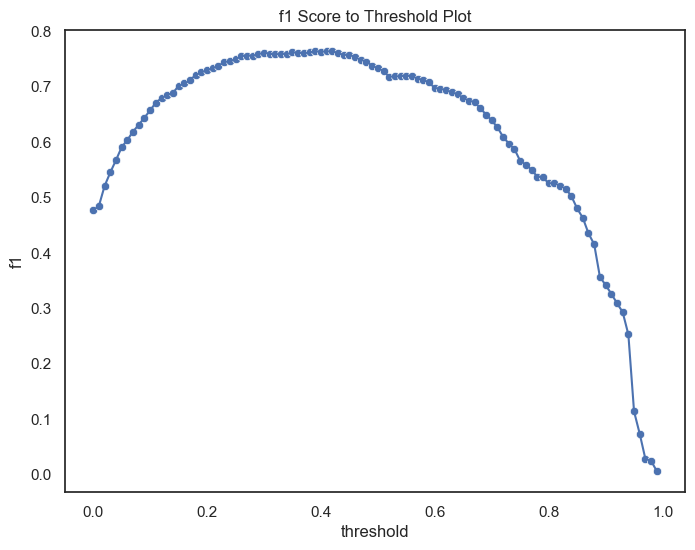

In [62]:
# visualize line plot
plt.figure(figsize=(8,6))
plt.title('f1 Score to Threshold Plot')
sns.lineplot(data=df_threshold, x='threshold', y='f1')
sns.scatterplot(data=df_threshold, x='threshold', y='f1')
plt.show()

Best threshold on 0.42 with f1 score 0.763889

In [63]:
# define model
model = GradientBoostingClassifier(n_estimators = 200, min_samples_split = 9, min_samples_leaf = 9, max_depth = 3, learning_rate = 0.05, random_state=0)

# pipe prep model
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', gradient)
])

# fit
pipe_model.fit(X_train, y_train)

# predict
y_pred_proba = pipe_model.predict_proba(X_test)[:,1]
y_pred_class = np.where(y_pred_proba > 0.42, 1, 0)

# f1 score
f1_optimized = f1_score(y_test,y_pred_class)
f1_optimized

0.7638888888888888

In [64]:
# define model
model = {'GradientBoosting':GradientBoostingClassifier(n_estimators = 200, min_samples_split = 9, min_samples_leaf = 9, max_depth = 3, learning_rate = 0.05, random_state=0)}

# visualize result in dataframe
df_comparison = pd.DataFrame(
    {
        'f1_ros': randomsearch.best_score_,
        'f1_benchmark': f1_benchmark,
        'f1_optimized': f1_optimized
    }, index = model.keys()
)
df_comparison

,f1_ros,f1_benchmark,f1_optimized
GradientBoosting,0.752807,0.733002,0.763889


By optimizing threshold from originally 0.5 to 0.42, f1 score increases. Therefore Imbalance treatment used for this model is optimized threshold

## **9. Predict to Test Set**

Sebelum Tuning

In [65]:
# define best estimator
model = {'GradientBoost Predict':GradientBoostingClassifier(random_state=0)}

# pipe prep model
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', gradient)
])

# fit
pipe_model.fit(X_train, y_train)

# Predict
y_pred_before = pipe_model.predict(X_test)

# f1 score
df_result = pd.DataFrame(data={'F1 Before' : f1_score(y_test, y_pred_before)}, index=model.keys())
df_result

,F1 Before
GradientBoost Predict,0.733002


Setelah tuning

In [51]:
# define best estimator
gb_tuning = randomsearch.best_estimator_

# fit
gb_tuning.fit(X_train, y_train)

# predict
y_pred_proba = gb_tuning.predict_proba(X_test)[:,1]
y_pred_after = np.where(y_pred_proba > 0.42, 1, 0)

# f1 score
df_result['F1 After'] = f1_score(y_test,y_pred_after)
df_result

,F1 Before,F1 After
GradientBoost Predict,0.733002,0.750513


Confusion Matrix (before tuning)

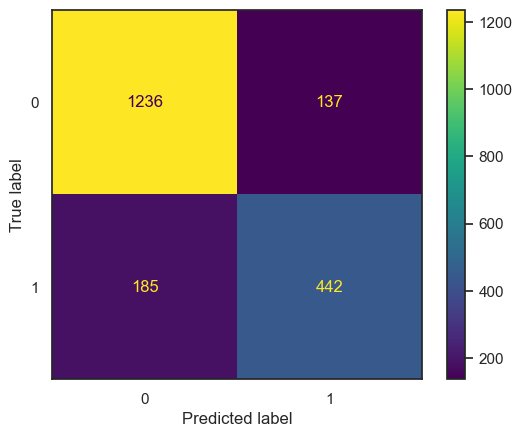

In [52]:
cm_before = confusion_matrix(y_test,y_pred_before)
disp_before = ConfusionMatrixDisplay(cm_before)
disp_before.plot()

Confusion Matrix (after tuning)

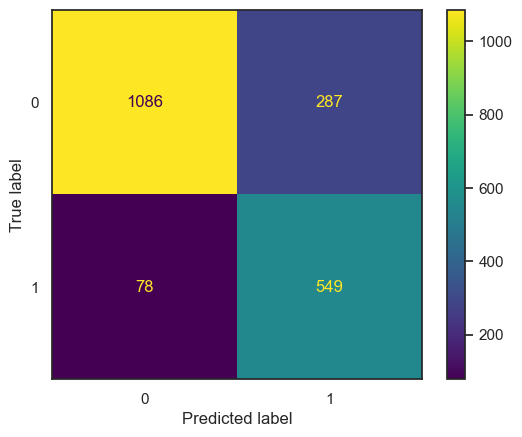

In [53]:
cm_after = confusion_matrix(y_test,y_pred_after)
disp_after = ConfusionMatrixDisplay(cm_after)
disp_after.plot()

## **Feature Importance**

Untuk mengetahui fitur apa saja yang sangat berpengaruh terhadap prediksi claim atau tidak, dapat dicek melalui feature_importances_

In [54]:
importances = gb_tuning['modeling'].feature_importances_
feature_names = gb_tuning[:-1].get_feature_names_out()

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importances_df = importances_df.sort_values(by='importance', ascending=False)
importances_df

,feature,importance
19,pipe_simple_robust__SPEEDING_VIOLATIONS,0.169525
22,remainder__VEHICLE_OWNERSHIP,0.168815
21,pipe_simple_robust__PAST_ACCIDENTS,0.134576
14,binary__AGE_0,0.130778
4,onehot__VEHICLE_YEAR_after 2015,0.073395
12,binary__POSTAL_CODE_1,0.055784
13,binary__POSTAL_CODE_2,0.054507
5,onehot__VEHICLE_YEAR_before 2015,0.040560
0,onehot__GENDER_female,0.032076
16,binary__AGE_2,0.023495


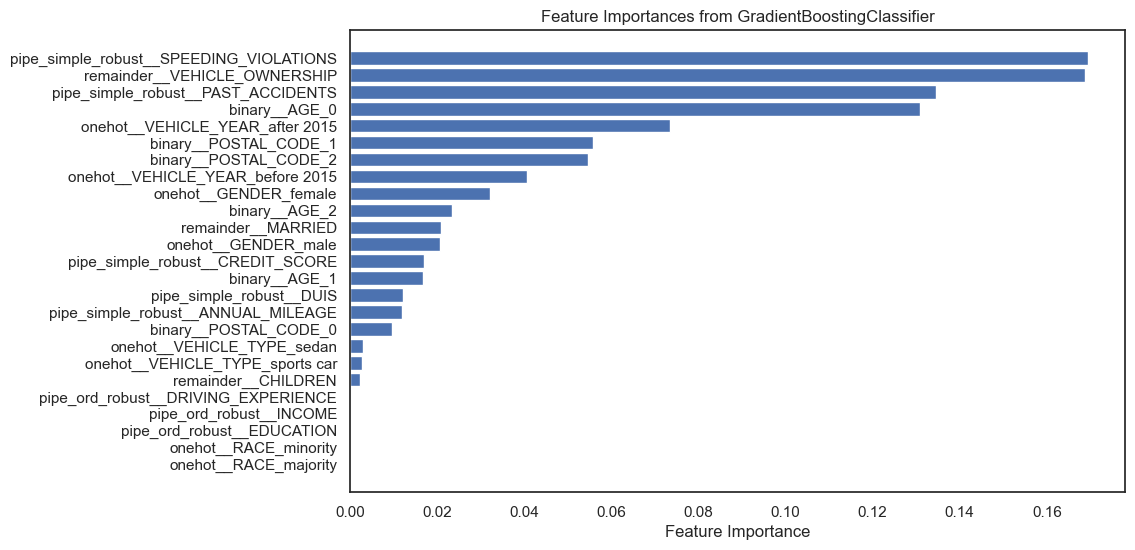

In [55]:
plt.figure(figsize=(10, 6))
plt.barh(importances_df['feature'], importances_df['importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances from GradientBoostingClassifier')
plt.gca().invert_yaxis()
plt.show()

Kesimpulan:
> Dengan menggunakan penilaian f1 score, didapatkan hasil FN yang semula 185 menjadi 78 setelah dituning. Artinya perusahaan dapat mengurangi potensi kerugian sebesar 107 Miliar Rupiah.

> Sedangkan hasil FP yang semula 137 meningkat menjadi 287 setelah dituning. Artinya perusahaan dapat memperoleh potensi kerugian sebesar 45 Miliar Rupiah.

> Secara keseluruhan, model machine learning dapat mengurangi potensi kerugian sebesar 62 Miliar Rupiah.

> Model machine learning masih dapat dikembangkan lagi dengan cara:
- Memperbanyak data customer yang claimnya berhasil.
- Menggunakan gridsearch untuk mendapatkan hasil yang lebih optimal.